In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/Shared drives/SI671_final_project/SI671_final_project/Data_file'

Mounted at /content/drive
/content/drive/My Drive/SI 671/project


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [ ]:
df = pd.read_json('Grocery_and_Gourmet_Food_5.json', lines=True)
print(df.columns)

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')


In [ ]:
recomd = pd.DataFrame([])
recomd['userId'] = df['reviewerID']
recomd['productId'] = df['asin']
recomd['Rating'] = df['overall'].astype('float')
recomd.head()

,userId,productId,Rating
0,A1QVBUH9E1V6I8,4639725183,5.0
1,A3GEOILWLK86XM,4639725183,5.0
2,A32RD6L701BIGP,4639725183,5.0
3,A2UY1O1FBGKIE6,4639725183,5.0
4,A3QHVBQYDV7Z6U,4639725183,5.0


In [ ]:
print(recomd.info())
print("\nShape of Data:",recomd.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143860 entries, 0 to 1143859
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1143860 non-null  object 
 1   productId  1143860 non-null  object 
 2   Rating     1143860 non-null  float64
dtypes: float64(1), object(2)
memory usage: 26.2+ MB
None

Shape of Data: (1143860, 3)


In [ ]:
recomd.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

In [ ]:
recomd.describe()

,Rating
count,1.143860e+06
mean,4.442209e+00
std,1.063901e+00
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
print("Unique Customers: ",recomd.userId.nunique())
print("Unique Products: ",recomd.productId.nunique())

Unique Customers:  127496
Unique Products:  41320


In [ ]:
data_user_rate=pd.DataFrame(recomd.groupby('userId')['Rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_user_rate.head(20)

,mean,count
userId,,
A1LACH6MLQWZ,4.937063,572
A2GJX2KCUSR0EI,4.393795,419
A1GQAKL9CGQLP1,4.477108,415
A2C9XE9I8RSKNX,4.319372,382
A2XKJ1KX6XUHYP,3.876374,364
A3OXHLG6DIBRW8,4.631922,307
A2MNB77YGJ3CN0,4.611684,291
A2PF64RBR1G1SZ,4.977778,270
AY12DBB0U420B,4.576208,269


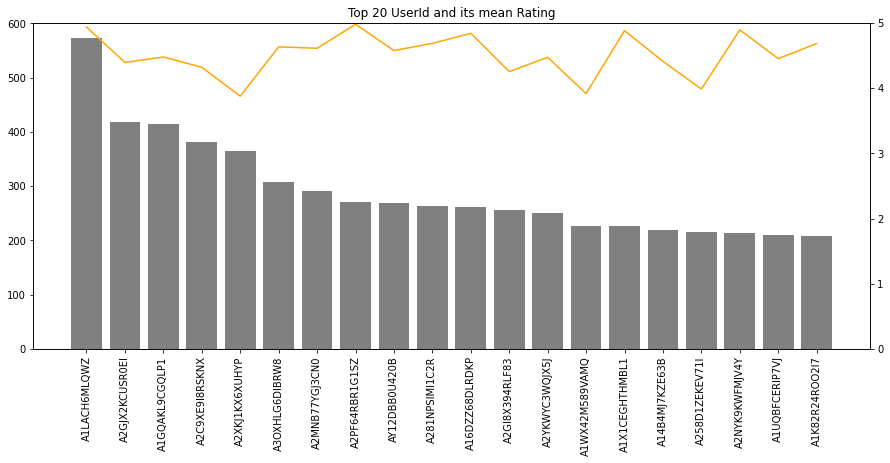

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_user_rate.index,data_user_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_user_rate.index,data_user_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 UserId and its mean Rating")
plt.show()

In [ ]:
data_prod_rate=pd.DataFrame(recomd.groupby('productId')['Rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
data_prod_rate.head(20)

,mean,count
productId,,
B00BUKL666,4.585353,7387
B008QMX2SG,4.573539,6228
B00D3M2QP4,4.573702,6221
B00R7PWK7W,4.568645,3387
B000X3TPHS,4.756436,3030
B0001LO3FG,4.623546,2922
B000F4DKAI,4.623546,2922
B00KSN9TME,4.583997,2637
B000U0OUP6,4.558594,2560


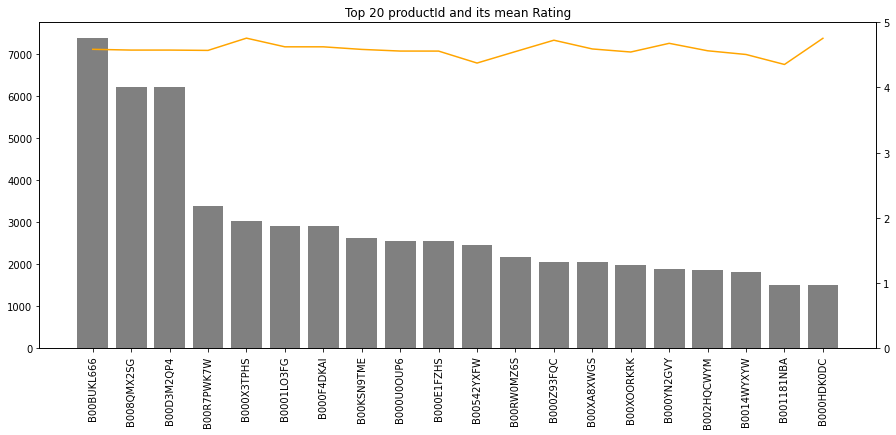

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_prod_rate.index,data_prod_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_prod_rate.index,data_prod_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 productId and its mean Rating")
plt.show()

5.0    820387
4.0    150771
3.0     80706
1.0     49864
2.0     42132
Name: Rating, dtype: int64


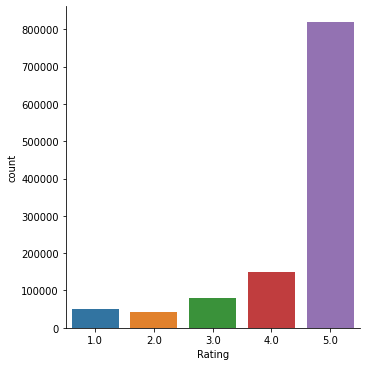

In [ ]:
print(recomd.Rating.value_counts())
sns.catplot("Rating",data=recomd,kind='count')

In [ ]:
#Mean of Rating
print("Mean of Rating:",np.mean(recomd.Rating))
#Median of Rating
print("Median of Rating:",np.median(recomd.Rating))

Mean of Rating: 4.442208836745755
Median of Rating: 5.0


In [ ]:
data_flt=recomd.userId.value_counts()
data_flt[data_flt.values>=10].index.shape

(31230,)

In [ ]:
data_final=recomd[recomd['userId'].isin(data_flt[data_flt>=50].index)]
data_final.shape

(62589, 3)

In [ ]:
print("No of users giving rating for atleast 40 products:",(len(data_final)/len(recomd))*100)

No of users giving rating for atleast 40 products: 5.471736051614708


5.0    41455
4.0    11723
3.0     5182
2.0     2147
1.0     2082
Name: Rating, dtype: int64


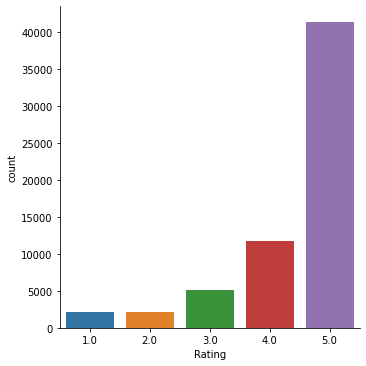

In [ ]:
print(data_final.Rating.value_counts())
sns.catplot("Rating",data=data_final,kind='count')

In [ ]:
print("Unique Customers: ",data_final.userId.nunique())
print("Unique Products: ",data_final.productId.nunique())

Unique Customers:  774
Unique Products:  20812


In [ ]:
data_flt_prod = data_final.productId.value_counts()
#Mean of Rating
print("Mean of Rating:",np.mean(data_final.Rating))
#Median of Rating
print("Median of Rating:",np.median(data_final.Rating))

Mean of Rating: 4.411142533032961
Median of Rating: 5.0


In [ ]:
data_final_1 = data_final[data_final['productId'].isin(data_flt_prod[data_flt_prod>=1].index)]
data_final_1.groupby('productId').size().sort_values(ascending=False)

productId
B000U0OUP6    162
B000E1FZHS    161
B00BUKL666    150
B00XOORKRK    121
B008QMX2SG    107
             ... 
B009IUP1RA      1
B009IJ6LAW      1
B009IFOTSC      1
B009IFOTFU      1
B005ZEMHVG      1
Length: 20812, dtype: int64

In [ ]:
data_final_1.head(10)

,userId,productId,Rating
26,ALOGZDSPWZI72,4639725043,4.0
36,AADZHUJW0KSDC,4639725043,4.0
72,A1BJVYTBOS2AGM,9742356831,5.0
85,ANTWFVZZKSBSF,9742356831,5.0
88,A216SKRFFQU4ZM,9742356831,5.0
105,A37AO20OXS51QA,9742356831,5.0
171,A1JZFGZEZVWQPY,B000052X2S,5.0
173,A2R6RA8FRBS608,B000052Y74,4.0
193,AVO94A66EQGFH,B00005344V,5.0
227,A2V4P6IRCK1P70,B00005BPQ9,5.0


In [ ]:
print("A user rated atleast 50 times and each product is rated atleast 5 times:"
      ,(len(data_final_1)/len(recomd))*100)

A user rated atleast 50 times and each product is rated atleast 5 times: 5.471736051614708


In [ ]:
#Mean of Rating
print("Mean of Rating:",np.mean(data_final_1.Rating))
#Median of Rating
print("Median of Rating:",np.median(data_final_1.Rating))

Mean of Rating: 4.411142533032961
Median of Rating: 5.0


5.0    41455
4.0    11723
3.0     5182
2.0     2147
1.0     2082
Name: Rating, dtype: int64


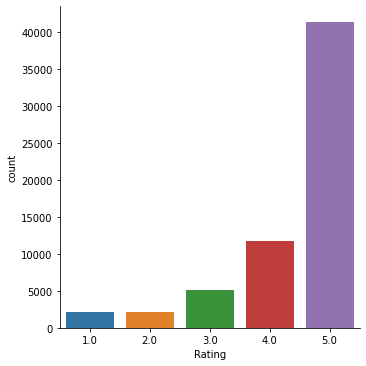

In [ ]:
#Rating value_count
print(data_final_1.Rating.value_counts())
sns.catplot("Rating",data=data_final_1,kind='count')

In [ ]:
print(data_final_1.shape)

(62589, 3)


In [ ]:
#No of unique customers and products
print("Unique Customers: ",data_final_1.userId.nunique())
print("Unique Products: ",data_final_1.productId.nunique())

Unique Customers:  774
Unique Products:  20812


In [ ]:
#Filling products which are not rated zero and taking pivot to categorize each user with product they rated
final_ratings_matrix = pd.pivot_table(data_final_1,index='userId',columns='productId',values = 'Rating').fillna(0)

In [ ]:
#Checking the density of rated products. User provided ratings to very less products or we can also say they didint bought 
#those products
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print('density: {:4.2f}%'.format(density))

given_num_of_ratings =  57061
possible_num_of_ratings =  16108488
density: 0.35%


In [ ]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100WO06OQR8BQ,A1047EDJ84IMAS,A10AFVU66A79Y1,A11ED8O95W2103,A11OTLEDSW8ZXD,A11TT460OXJPVA,A11WNQ3PPU73Y1,A12CBDHX1MJLGZ,A12FLMSWRKK2IK,A12JTIKL4N0H3V,A12O5SEIF162P8,A133WTB1VRDXZH,A13A9PCM2ANM92,A13GZCHAMKWYBT,A13HRSMJ5TOWEZ,A13J2PGKNMJG1K,A13MKSASQ6YWL7,A13RPNACUTRP2N,A13SKO9WKTSFHF,A13UAVT45110ZB,A13WOT3RSXKRD5,A143X0EUX2LCDS,A149L4IP4RQ8S9,A14B4MJ7KZE63B,A14R9XMZVJ6INB,A15GHUAXG7RZ0B,A15I1LRO2XQJSP,A15R7AS2ZDB0RK,A15RT5XOD85Q29,A15XHOMR3OAMBN,A16AXQ11SZA8SQ,A16DZZ68DLRDKP,A16KK3YHCWE29C,A16OIOSYTBL200,A16WPA6JV83YXT,A16Y4XT2V6IT59,A175N19FS2B4J,A17AQ91BRQ7P3Q,A17DW6SUOC70DJ,A17G3Z19SV8DSW,...,ASHKZADM38FZY,ASIMGGFNX403E,ASPL6U4HAODI7,ASVIOVAEXRI2A,AT53ZTTO707MB,ATECU14VUIOJ0,ATJN4KEHJBOC8,ATUCE4W2HNDAE,ATUXNR3WHD18N,AU4KADTG2LKB8,AUA29FELQ9CB6,AUDKWPXRAFHTO,AV2UQKLI45XBR,AVFA1JB08RG8G,AVJV35095JH71,AVO94A66EQGFH,AVP1NL6GYMVR,AVTQB8FI2KW8Q,AVXT4NX7CHKX8,AVZNYJVJ7HJ9M,AW4B4Z6HFFRLU,AW6J9IILGOZY3,AW8WTEWW0WPIJ,AWBBFXTYT2ZNA,AWP3OETSAYH0V,AX80SWHDEKJCY,AXK37UZY8UPYP,AXO4PQU0XG3TG,AXUJFOFQZNTN,AY0WPNYO66YAA,AY12DBB0U420B,AY1EF0GOH80EK,AY49JOXTLDOG2,AYGJ96W5KQMUJ,AYNAH993VDECT,AYOMAHLWRQHUG,AYQQOW0VR0YF5,AZPS09VLXJDQP,AZU8GQQW6HESP,AZV26LP92E6WU
productId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4639725043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9742356831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000052X2S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B000052Y74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00005344V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
#Split the data randomnly into test and train datasets
#Split the training and test data in the ratio 70:30
train_data, test_data = train_test_split(data_final_1, test_size = 0.3, random_state=10)
train_data.head()

,userId,productId,Rating
1081915,A17Y465UXZOJE3,B0072EMHVC,4.0
46401,AWBBFXTYT2ZNA,B000COIT8O,5.0
413462,A2XKJ1KX6XUHYP,B003B6NAZ2,4.0
477481,A3LE3RPDN4X0QU,B004NYDPCO,5.0
127631,A11ED8O95W2103,B000KOUKK6,5.0


In [ ]:
print(train_data.shape)
print(test_data.shape)

(43812, 3)
(18777, 3)


In [ ]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId':'count','Rating':'mean'}).reset_index()
train_data_grouped.rename(columns={'userId':'count','Rating':'mean'},inplace=True)
train_data_grouped.head()

,productId,count,mean
0,9742356831,3,5.00
1,B000052X2S,2,5.00
2,B000052Y74,1,3.00
3,B00005BPQ9,4,4.75
4,B00006BN4U,4,3.75


In [ ]:
#Sort the count on recommendation score 
train_data_sort = train_data_grouped.sort_values(['count'], ascending = 0) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['count'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,productId,count,mean,Rank
2658,B000U0OUP6,118,4.483051,1.0
11052,B00BUKL666,110,4.472727,2.0
740,B000E1FZHS,107,4.448598,3.0
11603,B00D3M2QP4,81,4.481481,4.0
15621,B00XOORKRK,81,4.506173,5.0


In [ ]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1]
    user_recommendations = user_recommendations[cols]       
    return user_recommendations

In [ ]:
find_recom = [1267,385,40]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: ", i)
    print("The products are most sold along with there mean rating:\n")
    print(recommend(i))    
    print("\n")

Here is the recommendation for the userId:  1267
The products are most sold along with there mean rating:

       userId   productId  count      mean  Rank
2658     1267  B000U0OUP6    118  4.483051   1.0
11052    1267  B00BUKL666    110  4.472727   2.0
740      1267  B000E1FZHS    107  4.448598   3.0
11603    1267  B00D3M2QP4     81  4.481481   4.0
15621    1267  B00XOORKRK     81  4.506173   5.0


Here is the recommendation for the userId:  385
The products are most sold along with there mean rating:

       userId   productId  count      mean  Rank
2658      385  B000U0OUP6    118  4.483051   1.0
11052     385  B00BUKL666    110  4.472727   2.0
740       385  B000E1FZHS    107  4.448598   3.0
11603     385  B00D3M2QP4     81  4.481481   4.0
15621     385  B00XOORKRK     81  4.506173   5.0


Here is the recommendation for the userId:  40
The products are most sold along with there mean rating:

       userId   productId  count      mean  Rank
2658       40  B000U0OUP6    118  4.48305

In [ ]:
train_final_ratings_matrix = pd.pivot_table(train_data,index='userId',columns='productId',values = 'Rating').fillna(0)
test_final_ratings_matrix = pd.pivot_table(test_data,index='userId',columns='productId',values = 'Rating').fillna(0)

In [ ]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix['user_index'] = np.arange(0, train_final_ratings_matrix.shape[0], 1)
train_final_ratings_matrix.head(10)

productId,9742356831,B000052X2S,B000052Y74,B00005BPQ9,B00006BN4U,B00006FMLY,B00006IDJU,B00006IDK9,B00008RCN8,B0000A0BS3,B0000A0BS5,B0000AE5ZF,B0000CD02T,B0000CDBPT,B0000CDEPD,B0000CEO8F,B0000CERE4,B0000CFMU7,B0000CFMXV,B0000CFPI2,B0000CG41W,B0000CH39R,B0000CH4FT,B0000CH4GM,B0000CH4GY,B0000CNU0C,B0000CNU15,B0000CNU1B,B0000CNU1S,B0000CNU1X,B0000CNU28,B0000CNU5B,B0000D17YU,B0000D198T,B0000D9169,B0000D916Y,B0000D9MT1,B0000D9MT2,B0000D9MYM,B0000D9N1H,...,B01GVEPRVK,B01GVTYDUG,B01GVYCQCI,B01GW1MXQO,B01GXPS1MO,B01GZUSXSO,B01GZWIXBY,B01H0AI4VE,B01H0AI5JK,B01H0AI5KE,B01H13YFJK,B01H37XMJ8,B01H39EBZU,B01H3VFR6U,B01H3VFVT8,B01H4G38JM,B01H4LCDQQ,B01H4OCQDI,B01H5GBQH2,B01H5NAW0M,B01H5TO5CM,B01H6FVVL8,B01H6IQING,B01H6JO1EI,B01H73VY7K,B01H74NYMC,B01H7L4AFA,B01HATGA8Y,B01HBEFPO8,B01HCL8A1A,B01HCS7SPW,B01HCV88MQ,B01HDR1RX6,B01HDWTC74,B01HGBAFNC,B01HH79WPM,B01HH79XRE,B01HHXH6WM,B01HJ4FWGG,user_index
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0
A1047EDJ84IMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,2
A11ED8O95W2103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A11OTLEDSW8ZXD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
A11TT460OXJPVA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
A11WNQ3PPU73Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
A12CBDHX1MJLGZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
A12FLMSWRKK2IK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#Test Data
test_final_ratings_matrix['user_index'] = np.arange(0, test_final_ratings_matrix.shape[0], 1)
test_final_ratings_matrix.head()

productId,4639725043,9742356831,B000052Y74,B00005344V,B00005BPQ9,B00006BN4U,B00006FMLY,B00006G930,B00006IDJY,B00006IDK9,B00008RCN8,B0000A9XZO,B0000CD02T,B0000CDBQL,B0000CDEPD,B0000CEO8F,B0000CFPI2,B0000CH4FT,B0000CH4GM,B0000CNU0C,B0000CNU15,B0000CNU1B,B0000D17HK,B0000D94PA,B0000D9MT1,B0000DBN2F,B0000DBN2J,B0000DG8AR,B0000DGF9V,B0000DGFCO,B0000DHXGI,B0000DHXGL,B0000DHZY1,B0000DI085,B0000DI0KA,B0000DI145,B0000DID5X,B0000DIVU7,B0000DJ7SA,B0000E5JIU,...,B01GQ32OEY,B01GQ5GQEG,B01GQ5WKFA,B01GQ5WNC0,B01GQ5X4DW,B01GQ7UVS6,B01GQZ0P8Y,B01GSAEZ5G,B01GSW9U5Y,B01GSWBVNS,B01GT3KT52,B01GW5MPA4,B01GXPRIH8,B01H0XDZPG,B01H14PSSQ,B01H3VFR6U,B01H3VFVT8,B01H4G38JM,B01H4KQZHU,B01H4LEHG0,B01H4LEYIQ,B01H5JGJH6,B01H6FVVL8,B01H6GRIPK,B01H6IQING,B01H6JO1EI,B01H73VY7K,B01H74NCB0,B01H8ET9G6,B01HCS7SPW,B01HCV7R14,B01HCV88MQ,B01HDJB4SM,B01HFCI980,B01HGBAFNC,B01HH79XRE,B01HHH9YRS,B01HHXJEIG,B01HIP1990,user_index
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A1047EDJ84IMAS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A11ED8O95W2103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A11OTLEDSW8ZXD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4


In [ ]:
#Complete data
final_ratings_matrix.set_index(['user_index'], inplace=True)

#Train data
train_final_ratings_matrix.set_index(['user_index'], inplace=True)
train_final_ratings_matrix.head()

#Test Data
test_final_ratings_matrix.set_index(['user_index'], inplace=True)
test_final_ratings_matrix.head()

productId,4639725043,9742356831,B000052Y74,B00005344V,B00005BPQ9,B00006BN4U,B00006FMLY,B00006G930,B00006IDJY,B00006IDK9,B00008RCN8,B0000A9XZO,B0000CD02T,B0000CDBQL,B0000CDEPD,B0000CEO8F,B0000CFPI2,B0000CH4FT,B0000CH4GM,B0000CNU0C,B0000CNU15,B0000CNU1B,B0000D17HK,B0000D94PA,B0000D9MT1,B0000DBN2F,B0000DBN2J,B0000DG8AR,B0000DGF9V,B0000DGFCO,B0000DHXGI,B0000DHXGL,B0000DHZY1,B0000DI085,B0000DI0KA,B0000DI145,B0000DID5X,B0000DIVU7,B0000DJ7SA,B0000E5JIU,...,B01GQ2ZFEG,B01GQ32OEY,B01GQ5GQEG,B01GQ5WKFA,B01GQ5WNC0,B01GQ5X4DW,B01GQ7UVS6,B01GQZ0P8Y,B01GSAEZ5G,B01GSW9U5Y,B01GSWBVNS,B01GT3KT52,B01GW5MPA4,B01GXPRIH8,B01H0XDZPG,B01H14PSSQ,B01H3VFR6U,B01H3VFVT8,B01H4G38JM,B01H4KQZHU,B01H4LEHG0,B01H4LEYIQ,B01H5JGJH6,B01H6FVVL8,B01H6GRIPK,B01H6IQING,B01H6JO1EI,B01H73VY7K,B01H74NCB0,B01H8ET9G6,B01HCS7SPW,B01HCV7R14,B01HCV88MQ,B01HDJB4SM,B01HFCI980,B01HGBAFNC,B01HH79XRE,B01HHH9YRS,B01HHXJEIG,B01HIP1990
user_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(train_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [ ]:
train_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
train_preds_df = pd.DataFrame(train_predicted_ratings, columns = train_final_ratings_matrix.columns)
train_preds_df.head()

productId,9742356831,B000052X2S,B000052Y74,B00005BPQ9,B00006BN4U,B00006FMLY,B00006IDJU,B00006IDK9,B00008RCN8,B0000A0BS3,B0000A0BS5,B0000AE5ZF,B0000CD02T,B0000CDBPT,B0000CDEPD,B0000CEO8F,B0000CERE4,B0000CFMU7,B0000CFMXV,B0000CFPI2,B0000CG41W,B0000CH39R,B0000CH4FT,B0000CH4GM,B0000CH4GY,B0000CNU0C,B0000CNU15,B0000CNU1B,B0000CNU1S,B0000CNU1X,B0000CNU28,B0000CNU5B,B0000D17YU,B0000D198T,B0000D9169,B0000D916Y,B0000D9MT1,B0000D9MT2,B0000D9MYM,B0000D9N1H,...,B01GTNVWYY,B01GVEPRVK,B01GVTYDUG,B01GVYCQCI,B01GW1MXQO,B01GXPS1MO,B01GZUSXSO,B01GZWIXBY,B01H0AI4VE,B01H0AI5JK,B01H0AI5KE,B01H13YFJK,B01H37XMJ8,B01H39EBZU,B01H3VFR6U,B01H3VFVT8,B01H4G38JM,B01H4LCDQQ,B01H4OCQDI,B01H5GBQH2,B01H5NAW0M,B01H5TO5CM,B01H6FVVL8,B01H6IQING,B01H6JO1EI,B01H73VY7K,B01H74NYMC,B01H7L4AFA,B01HATGA8Y,B01HBEFPO8,B01HCL8A1A,B01HCS7SPW,B01HCV88MQ,B01HDR1RX6,B01HDWTC74,B01HGBAFNC,B01HH79WPM,B01HH79XRE,B01HHXH6WM,B01HJ4FWGG
0,0.016738,0.003311,0.001548,0.013460,0.013828,0.042272,0.002261,0.012844,0.028748,0.012507,0.003347,0.009177,0.004065,0.014809,0.001783,-0.005971,0.000513,0.001232,0.000578,0.018158,0.015741,0.008422,0.004170,0.000871,0.001473,0.004351,0.008676,-0.012095,0.037344,0.006166,0.020781,0.018071,-0.004509,-0.001713,0.005072,0.005072,-0.000346,0.001756,0.004170,0.001197,...,0.010123,0.002261,0.012269,-0.000804,-0.001738,-0.006452,0.001553,0.003219,0.017413,-0.000272,-0.000240,0.003810,-0.001175,-0.011621,0.198223,0.166037,0.011357,0.006970,0.004124,0.011053,-0.001236,-0.000344,-0.027192,-0.020207,0.023974,0.003982,0.000534,0.001192,-0.001452,-0.000168,-0.000517,0.000967,0.001645,0.002038,0.000564,0.191597,-0.001934,0.068630,0.000101,0.001006
1,0.012544,-0.007123,-0.002440,0.047498,-0.005212,0.027515,0.000242,-0.001092,-0.030589,-0.010970,0.004058,0.031053,0.025737,-0.008662,0.014908,0.100468,0.006456,-0.002684,0.000333,-0.014809,-0.007632,0.087526,-0.003697,0.004651,0.002922,0.006927,0.000169,0.026506,-0.049107,0.000938,-0.004672,-0.023167,0.069118,0.014870,0.026817,0.026817,0.010327,0.014285,-0.003697,0.007733,...,0.002625,0.000242,-0.010082,0.084695,0.050059,0.150560,0.000238,0.009191,-0.010687,0.002668,0.010778,0.011316,0.015080,0.015876,-0.026979,-0.051738,-0.016436,0.006149,0.003689,-0.009347,0.072315,0.008427,0.013943,0.317591,0.014545,0.008652,0.004442,0.000917,0.010829,0.051889,0.012158,0.010593,0.098647,0.001479,0.001654,-0.055429,0.014223,-0.008733,0.001818,0.000656
2,0.004250,0.012231,-0.002476,0.049063,0.001796,0.036033,-0.000204,0.005759,0.001665,-0.009531,0.001998,0.032454,0.011524,-0.014378,0.009796,0.096812,0.004784,0.011081,-0.000108,-0.001541,0.010705,0.073329,-0.005222,0.002050,0.002231,0.006023,-0.002021,0.029647,-0.025919,0.006869,0.011849,-0.000428,0.057696,0.006493,0.026627,0.026627,0.008458,0.009154,-0.005222,0.000852,...,0.013945,-0.000204,0.000596,0.059227,0.037594,0.113936,-0.000094,0.007492,0.007108,0.001541,0.006228,0.005629,0.006640,-0.009079,0.106273,0.120498,-0.013844,0.006315,0.003062,-0.002102,0.056650,0.004057,-0.036934,0.218160,0.034978,0.005885,0.004029,0.000834,0.004721,0.039383,0.006786,0.008439,0.073413,0.001901,0.001601,0.157969,0.005829,0.035445,0.001422,0.001116
3,0.006533,0.002814,0.000125,0.004718,0.002629,-0.006892,0.000447,0.002209,0.006263,0.000172,0.000635,0.002930,0.006906,-0.002394,0.003737,0.007102,0.001433,0.001509,0.000287,0.002645,0.002801,0.002039,-0.000309,0.000744,0.000519,0.002579,0.003201,0.008568,0.001548,0.001230,0.004580,0.004856,0.001993,0.003929,0.002256,0.002256,0.000164,0.001911,-0.000309,0.002116,...,0.002928,0.000447,0.002919,0.004213,0.000758,0.006842,0.000356,0.000838,0.002879,0.000244,0.000696,0.000418,0.004138,0.010248,-0.000056,0.028054,0.001378,0.001400,0.001835,0.001126,0.000737,0.002380,0.019948,0.040315,0.005687,0.001469,0.000392,0.000128,0.002303,0.001124,0.001728,0.002142,0.007001,-0.000144,0.000176,0.037157,0.003847,0.024737,0.000144,0.000220
4,0.001457,0.026123,-0.001024,0.007957,0.024658,-0.059820,-0.001318,0.039607,0.082744,-0.001839,-0.000293,0.045663,0.015567,0.017134,0.0

In [ ]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = final_ratings_matrix.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [ ]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 3
num_recommendations = 5
recommend_items(userID, train_final_ratings_matrix, train_preds_df, num_recommendations)


Below are the recommended items for user(user_id = 3):

                   user_ratings  user_predictions
Recommended Items                                
B00KSN9TME                  0.0          1.623784
B00R7PWK7W                  0.0          1.148278
B00TBUHRRO                  0.0          0.987590
B0014WYXYW                  0.0          0.664861
B0093J41PE                  0.0          0.664655


In [ ]:
# Average ACTUAL rating for each item
test_final_ratings_matrix.mean().head()

productId
4639725043    0.010336
9742356831    0.006460
B000052Y74    0.005168
B00005344V    0.006460
B00005BPQ9    0.024548
dtype: float64

In [ ]:
# Singular Value Decomposition
U_t, sigma_t, Vt_t = svds(test_final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma_t = np.diag(sigma_t)

In [ ]:
test_predicted_ratings = np.dot(np.dot(U_t, sigma_t), Vt_t) 

# Predicted ratings
test_preds_df = pd.DataFrame(test_predicted_ratings, columns = test_final_ratings_matrix.columns)
test_preds_df.head()

productId,4639725043,9742356831,B000052Y74,B00005344V,B00005BPQ9,B00006BN4U,B00006FMLY,B00006G930,B00006IDJY,B00006IDK9,B00008RCN8,B0000A9XZO,B0000CD02T,B0000CDBQL,B0000CDEPD,B0000CEO8F,B0000CFPI2,B0000CH4FT,B0000CH4GM,B0000CNU0C,B0000CNU15,B0000CNU1B,B0000D17HK,B0000D94PA,B0000D9MT1,B0000DBN2F,B0000DBN2J,B0000DG8AR,B0000DGF9V,B0000DGFCO,B0000DHXGI,B0000DHXGL,B0000DHZY1,B0000DI085,B0000DI0KA,B0000DI145,B0000DID5X,B0000DIVU7,B0000DJ7SA,B0000E5JIU,...,B01GQ2ZFEG,B01GQ32OEY,B01GQ5GQEG,B01GQ5WKFA,B01GQ5WNC0,B01GQ5X4DW,B01GQ7UVS6,B01GQZ0P8Y,B01GSAEZ5G,B01GSW9U5Y,B01GSWBVNS,B01GT3KT52,B01GW5MPA4,B01GXPRIH8,B01H0XDZPG,B01H14PSSQ,B01H3VFR6U,B01H3VFVT8,B01H4G38JM,B01H4KQZHU,B01H4LEHG0,B01H4LEYIQ,B01H5JGJH6,B01H6FVVL8,B01H6GRIPK,B01H6IQING,B01H6JO1EI,B01H73VY7K,B01H74NCB0,B01H8ET9G6,B01HCS7SPW,B01HCV7R14,B01HCV88MQ,B01HDJB4SM,B01HFCI980,B01HGBAFNC,B01HH79XRE,B01HHH9YRS,B01HHXJEIG,B01HIP1990
0,0.005451,0.008659,0.002850,0.001658,0.018426,0.003396,0.004797,0.000565,0.004233,0.086315,0.001759,0.001511,0.006601,0.068270,0.005383,0.002133,0.001174,0.003418,0.002311,0.008659,0.039642,0.001098,0.008675,0.002412,0.003119,0.003511,0.001416,0.001680,0.022578,0.000856,0.003967,0.017003,0.000247,0.003899,0.000450,0.014405,0.025010,0.000487,0.001358,0.001230,...,0.003819,0.001432,-0.001313,0.000936,0.011107,0.000301,0.001336,0.000553,0.009262,0.012686,0.005974,0.024409,0.003857,0.001768,0.002956,0.008362,0.065533,0.082766,0.004003,0.000320,0.000356,0.003353,0.000359,0.003529,0.007987,-0.015238,0.004764,0.004601,0.000220,0.002785,0.001464,0.001787,0.003495,0.002772,0.003012,0.006859,0.001904,0.000397,0.000442,0.001768
1,0.000313,0.001130,0.000146,0.000478,0.002998,0.000116,0.004171,0.000086,0.000469,0.002643,0.001721,0.000135,0.000972,0.001204,0.000438,0.000576,0.000651,0.000213,0.000230,0.001130,0.002273,0.000097,0.000990,0.000127,0.000173,0.000582,0.000705,0.000185,0.000777,0.000195,0.000187,0.002398,0.000526,0.000611,0.000144,0.002619,0.001373,0.000090,0.000165,0.000636,...,0.000711,0.000148,0.000927,0.000265,0.000788,0.000389,0.000091,0.000022,0.000451,0.001810,0.000812,0.002251,0.000330,0.000283,0.000277,0.001383,0.004070,0.003009,0.000479,0.000036,0.000075,0.001057,0.000133,0.000543,0.000311,0.001584,0.000691,0.000220,0.000044,0.000522,0.000489,0.000238,0.000586,0.000102,0.000238,0.000291,0.002063,0.000182,0.000018,0.000283
2,0.002572,0.007531,0.001140,0.001200,0.005728,0.002239,0.008493,0.000117,0.001634,0.019595,0.003234,0.000218,0.004880,0.014329,0.002365,0.001600,0.002362,0.001520,0.000716,0.007531,0.013098,0.000562,0.001912,0.000822,0.000680,0.002098,0.008217,0.000692,0.007642,0.001228,0.001886,0.008392,0.001973,0.005403,0.000005,0.009295,0.007630,0.000236,0.000734,0.002701,...,0.002057,0.000792,0.001161,0.000853,0.003896,-0.000132,0.000155,0.000196,0.003788,0.007496,0.003537,0.014301,0.001091,0.001269,0.001601,0.004778,0.028891,0.025622,0.001530,0.000172,0.000598,0.002770,0.000174,0.003372,0.001726,0.011339,0.004431,0.002322,0.000282,0.001748,0.001832,0.001131,0.001688,0.000843,0.001368,0.002975,0.000614,0.000467,0.000157,0.001269
3,0.001273,0.004144,0.000412,0.000369,0.001395,0.000980,0.008440,0.000086,0.000550,-0.003823,0.002516,0.000028,0.002219,-0.000181,0.001476,0.000545,0.001507,0.000559,0.000137,0.004144,0.000640,0.000122,-0.000228,0.000159,-0.000097,0.000526,0.006409,0.000376,0.001705,0.000826,0.000665,0.003333,0.001566,0.003705,0.000102,0.004410,0.002195,0.000043,0.000363,0.001518,...,0.000731,0.000428,0.001715,0.000508,0.001390,0.000182,-0.000021,0.000052,0.001171,0.003670,0.001326,0.005884,0.000216,0.000654,0.000718,0.001428,0.010101,0.004976,0.000451,0.000078,0.000402,0.001177,0.000013,0.001786,-0.000196,-0.000162,0.002628,0.000892,0.000167,0.000402,0.000834,0.000370,0.000784,0.000171,0.000481,0.000922,-0.000006,0.000330,0.000042,0.000654
4,0.001771,0.006123,0.001317,0.000676,0.000762,0.002969,0.003553,-0.000075,0.001960,0.016982,0.002335,-0.000101,0.003352,0.008579,0.001089,0.000918,0.003719,0.001396,0.000110,0.006123,0.01726

In [ ]:
# Average PREDICTED rating for each item
test_preds_df.mean().head()

productId
4639725043    0.002486
9742356831    0.007232
B000052Y74    0.001493
B00005344V    0.001098
B00005BPQ9    0.015617
dtype: float64

In [ ]:
rmse_df = pd.concat([test_final_ratings_matrix.mean(), test_preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(10293, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
4639725043,0.010336,0.002486,0
9742356831,0.006460,0.007232,1
B000052Y74,0.005168,0.001493,2
B00005344V,0.006460,0.001098,3
B00005BPQ9,0.024548,0.015617,4


In [ ]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0072 



In [ ]:
# Singular Value Decomposition
U, sigma, Vt = svds(final_ratings_matrix, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [ ]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(predicted_ratings, columns = final_ratings_matrix.columns)

In [ ]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 126
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 126):

                   user_ratings  user_predictions
Recommended Items                                
B001HTR1ZU                  0.0          0.420614
B0058AMYTC                  0.0          0.412140
B000168QTU                  0.0          0.369965
B000F4DKAI                  0.0          0.345296
B0001LO3FG                  0.0          0.345296


In [ ]:
userID = 385
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 385):

                   user_ratings  user_predictions
Recommended Items                                
B000U0OUP6                  0.0          0.269422
B000E1FZHS                  0.0          0.267631
B00BUKL666                  0.0          0.251037
B0001LO3FG                  0.0          0.230076
B000F4DKAI                  0.0          0.230076


In [ ]:
userID = 40
num_recommendations = 5
recommend_items(userID, final_ratings_matrix, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 40):

                   user_ratings  user_predictions
Recommended Items                                
B000E1HUVC                  0.0          0.923543
B0014EQI4I                  0.0          0.904233
B0014EW4N2                  0.0          0.904233
B0025UCIIA                  0.0          0.878708
B00C3YAH5E                  0.0          0.873586
